Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Importing the dataset

In [2]:
data = pd.read_csv ("./data/diabetes.csv")

Creating a DataFrame

In [3]:
df = pd.DataFrame (data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Shape and information

In [4]:
print ("Shape of data {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data (768, 9)
Number of rows: 768
Number of columns: 9


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Missing values:

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is not any missing values.

Observation:

There are 8 features and 768 entires, all non-null. All of the features are numerical and the target is categorical.

In [9]:
zero_count_per_column = (df == 0).sum()
print("Number of zeros per column:\n", zero_count_per_column)

Number of zeros per column:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Duplicates values:

In [10]:
print ("Duplicate values in df are:" , df.duplicated().sum())

Duplicate values in df are: 0


Unique categories of Categorical Variables

In [11]:
print(df['Outcome'].unique())

[1 0]


Correlation

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Graph'}>

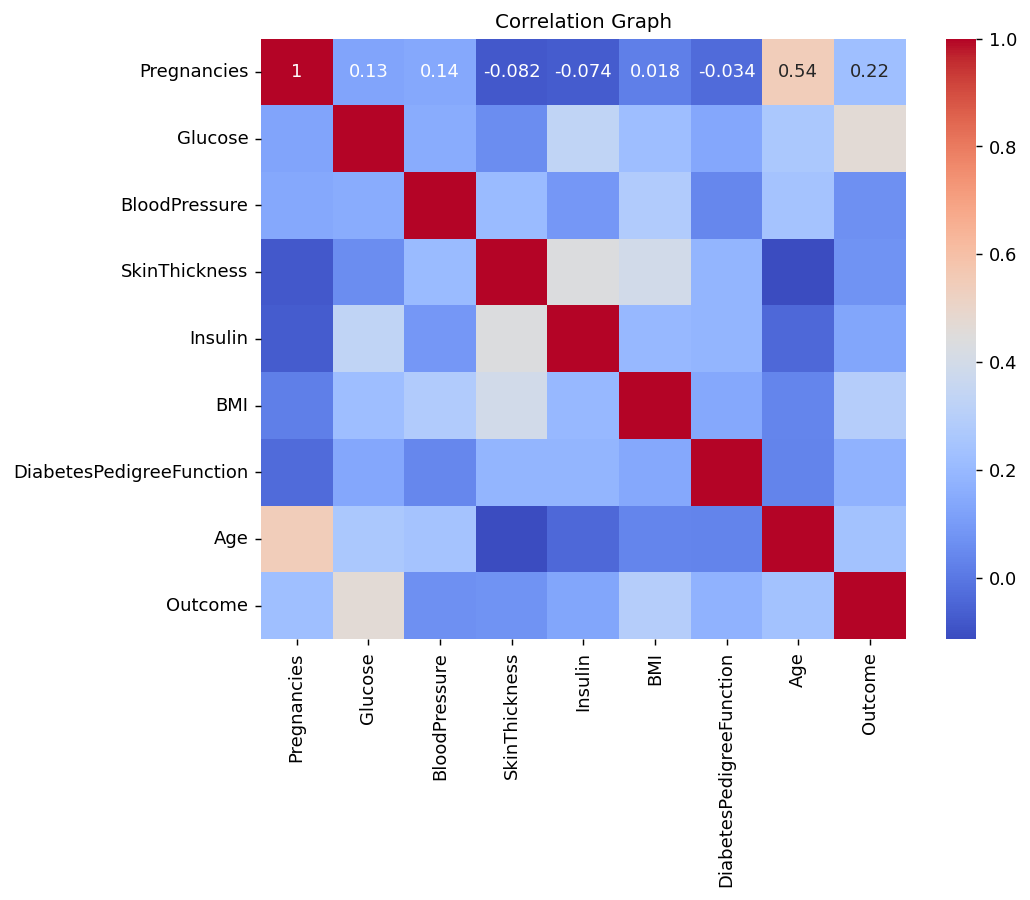

In [13]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

Visualization

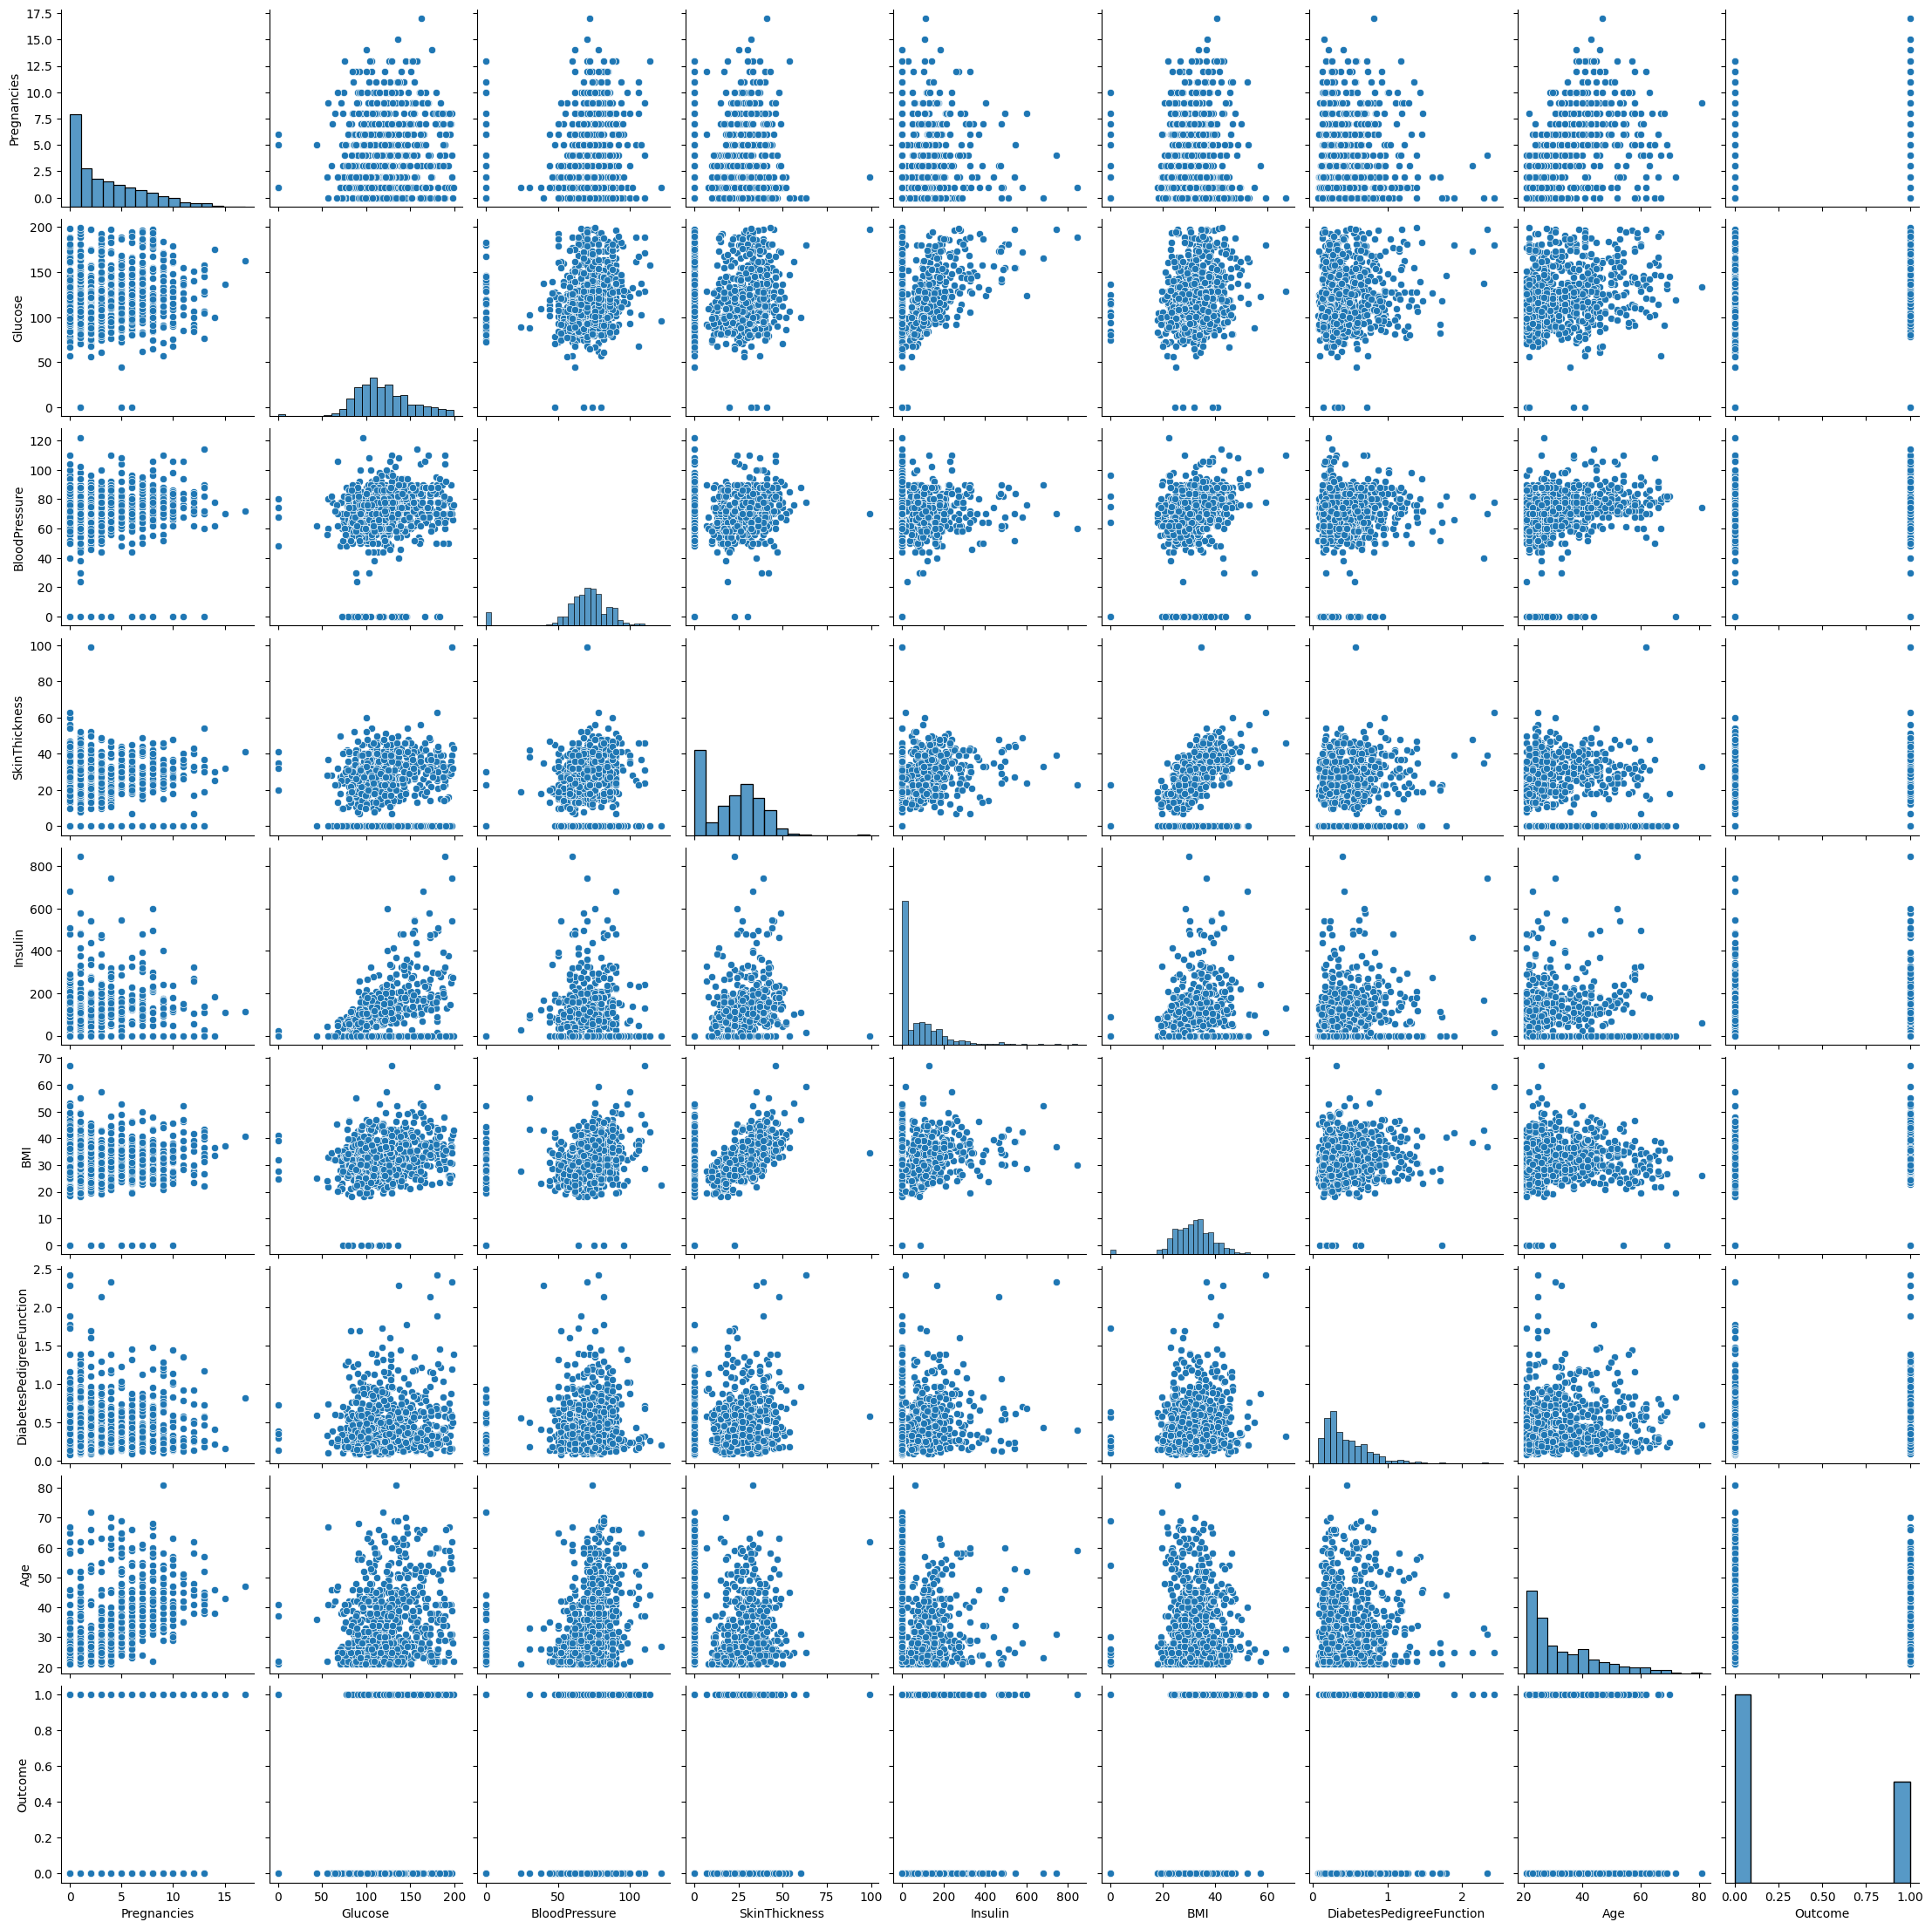

In [14]:
sns.pairplot(df)

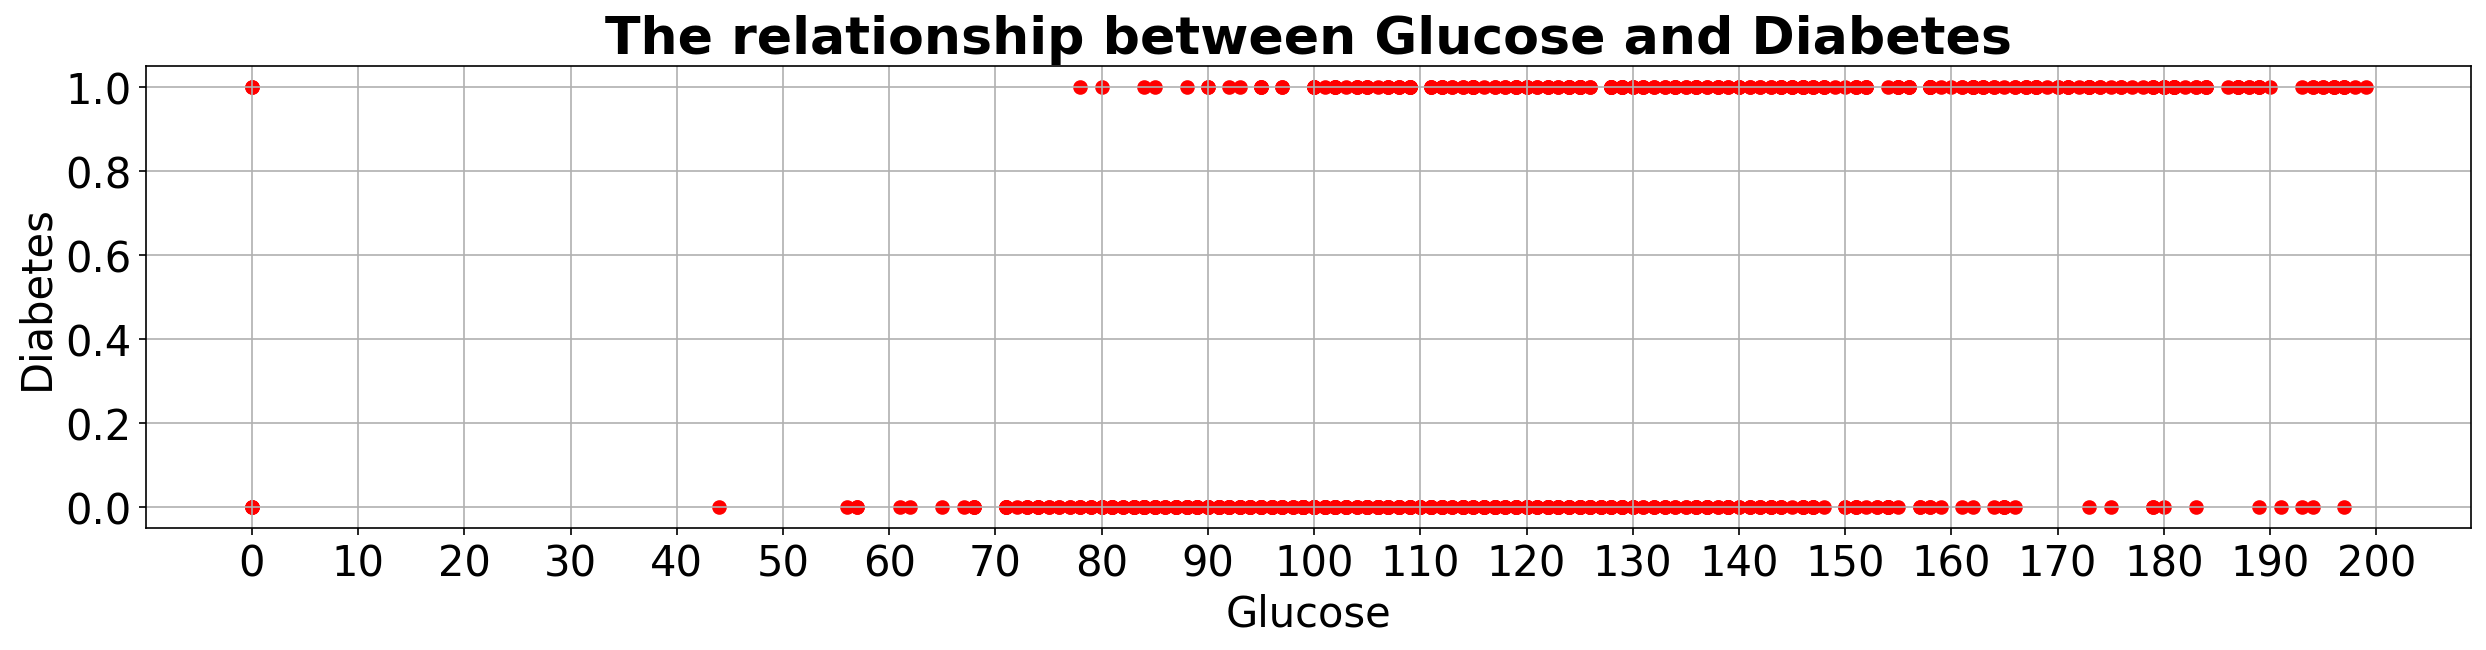

In [15]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Glucose"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Glucose and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

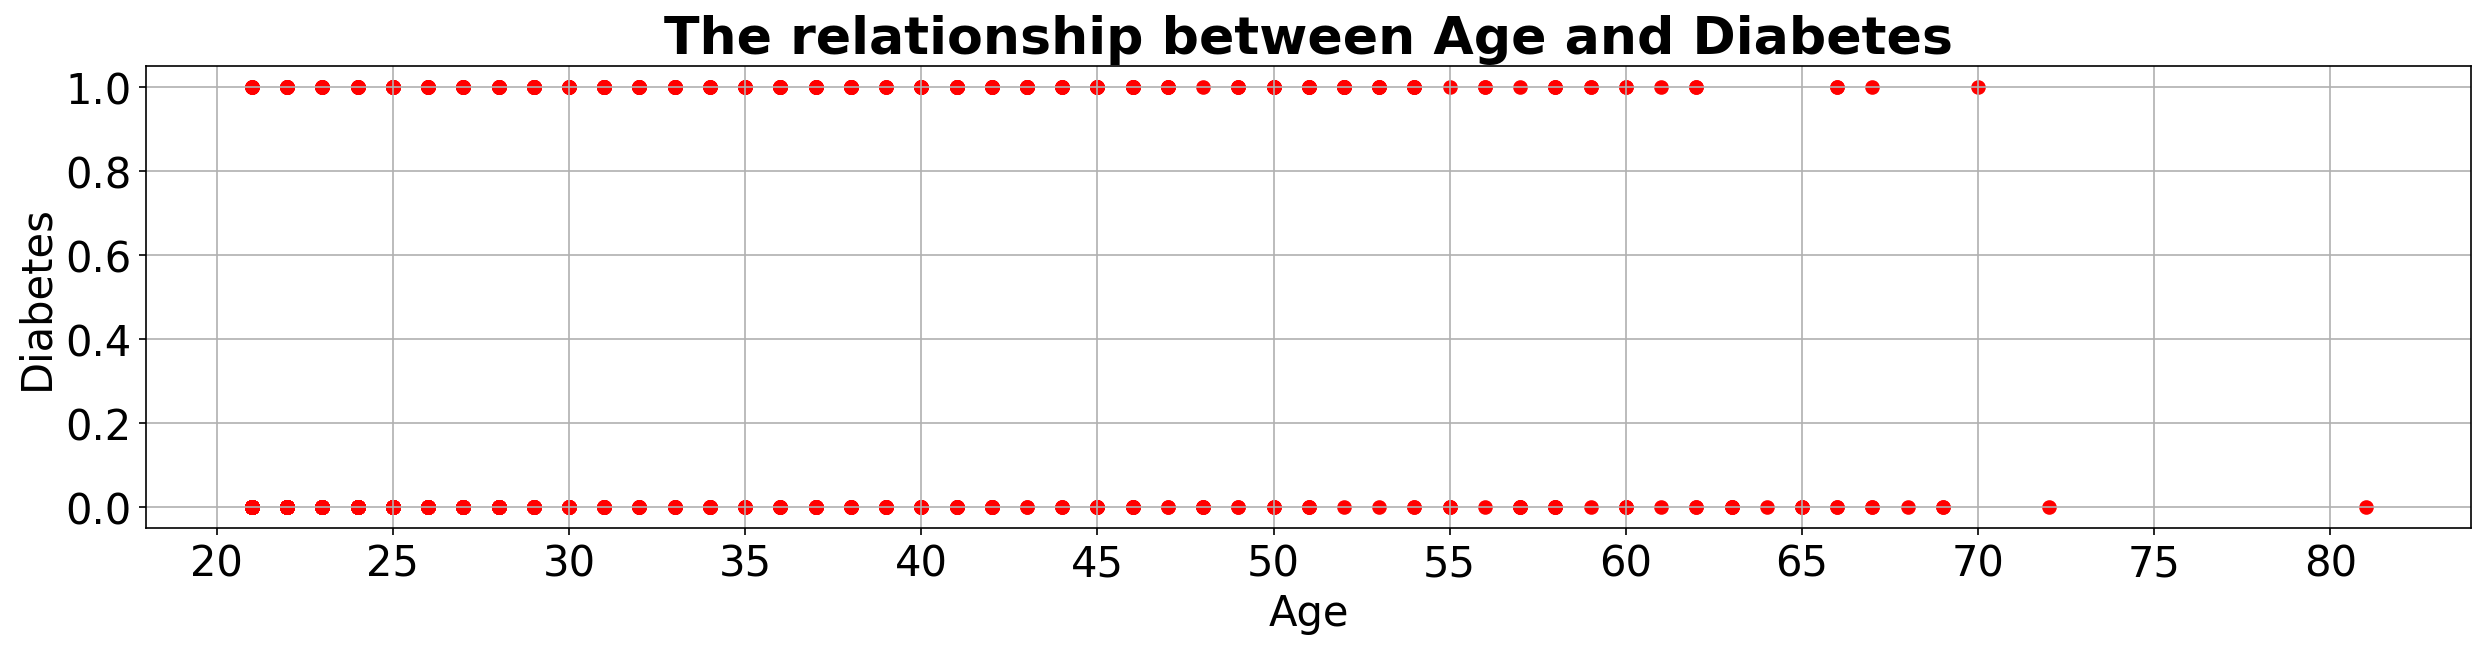

In [16]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Age"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Age and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (20 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Age', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

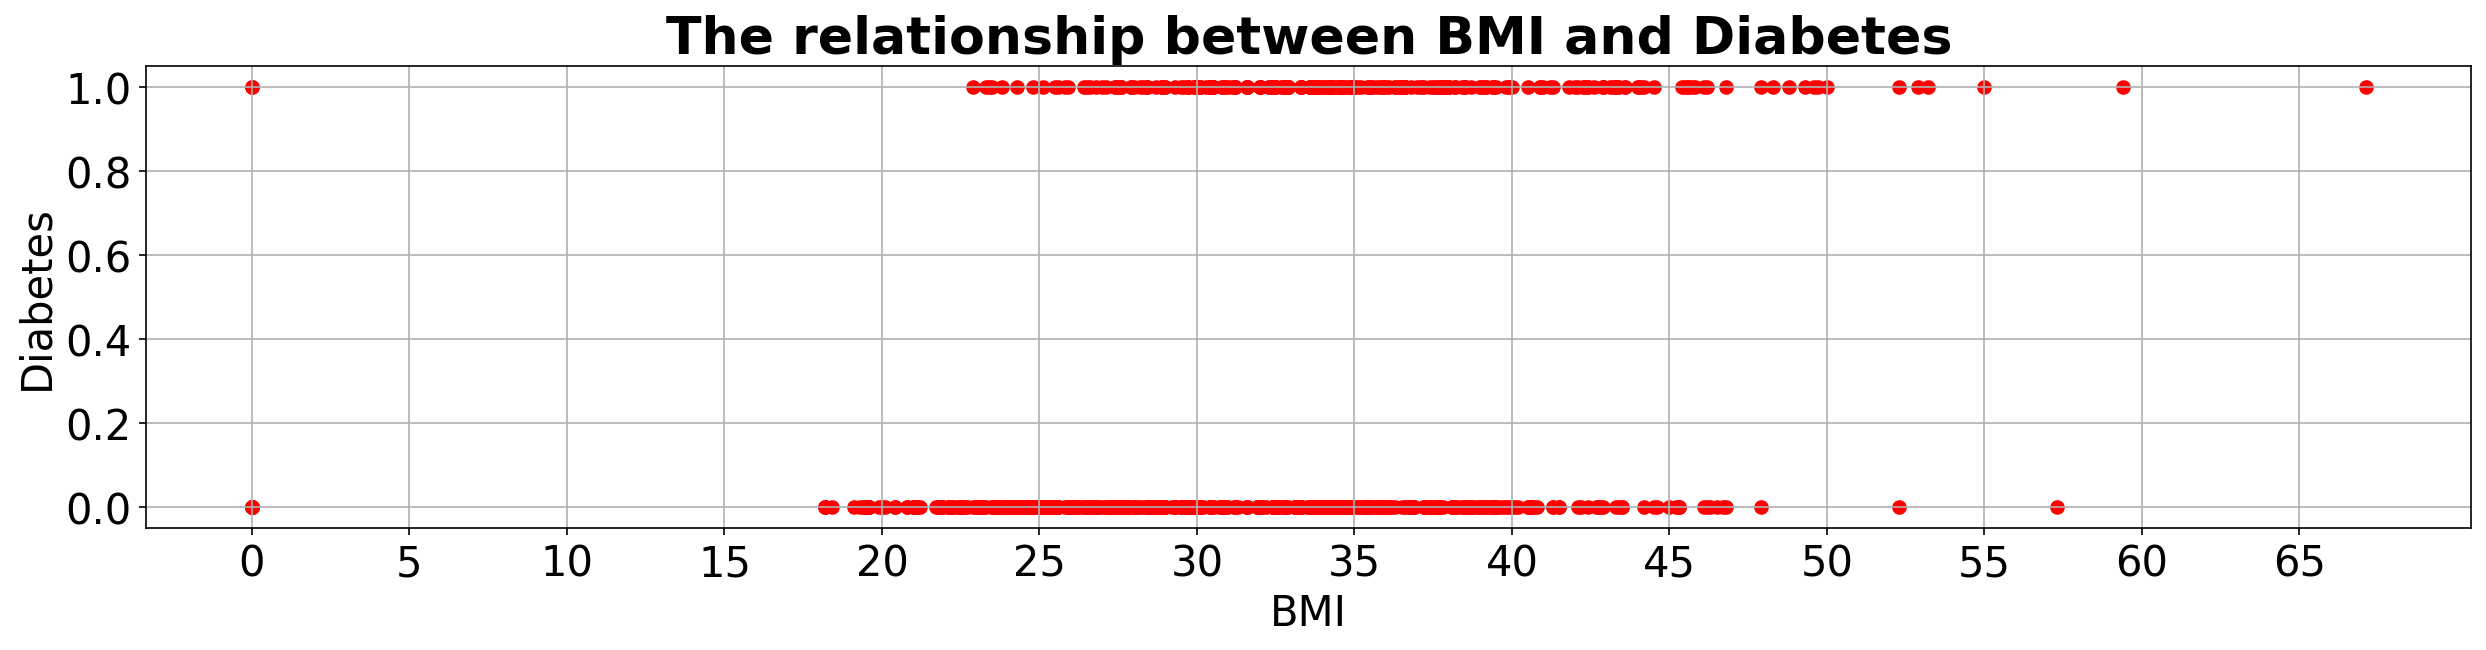

In [17]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

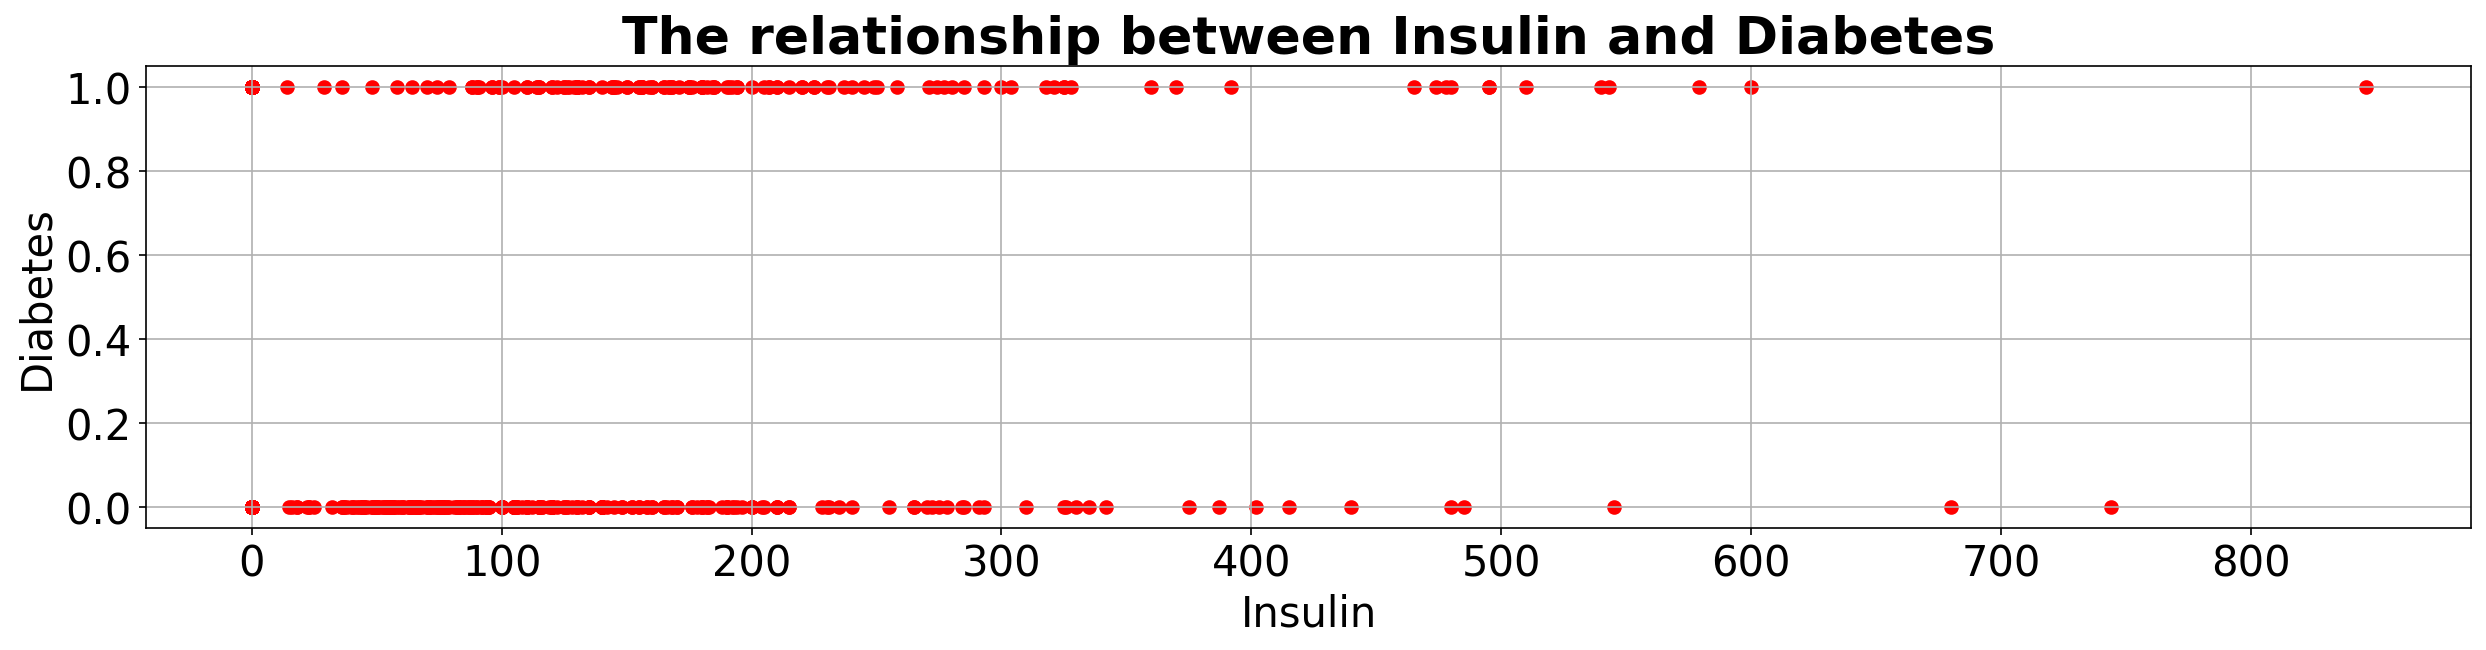

In [18]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["Insulin"] , df["Outcome"] , color = "red")
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

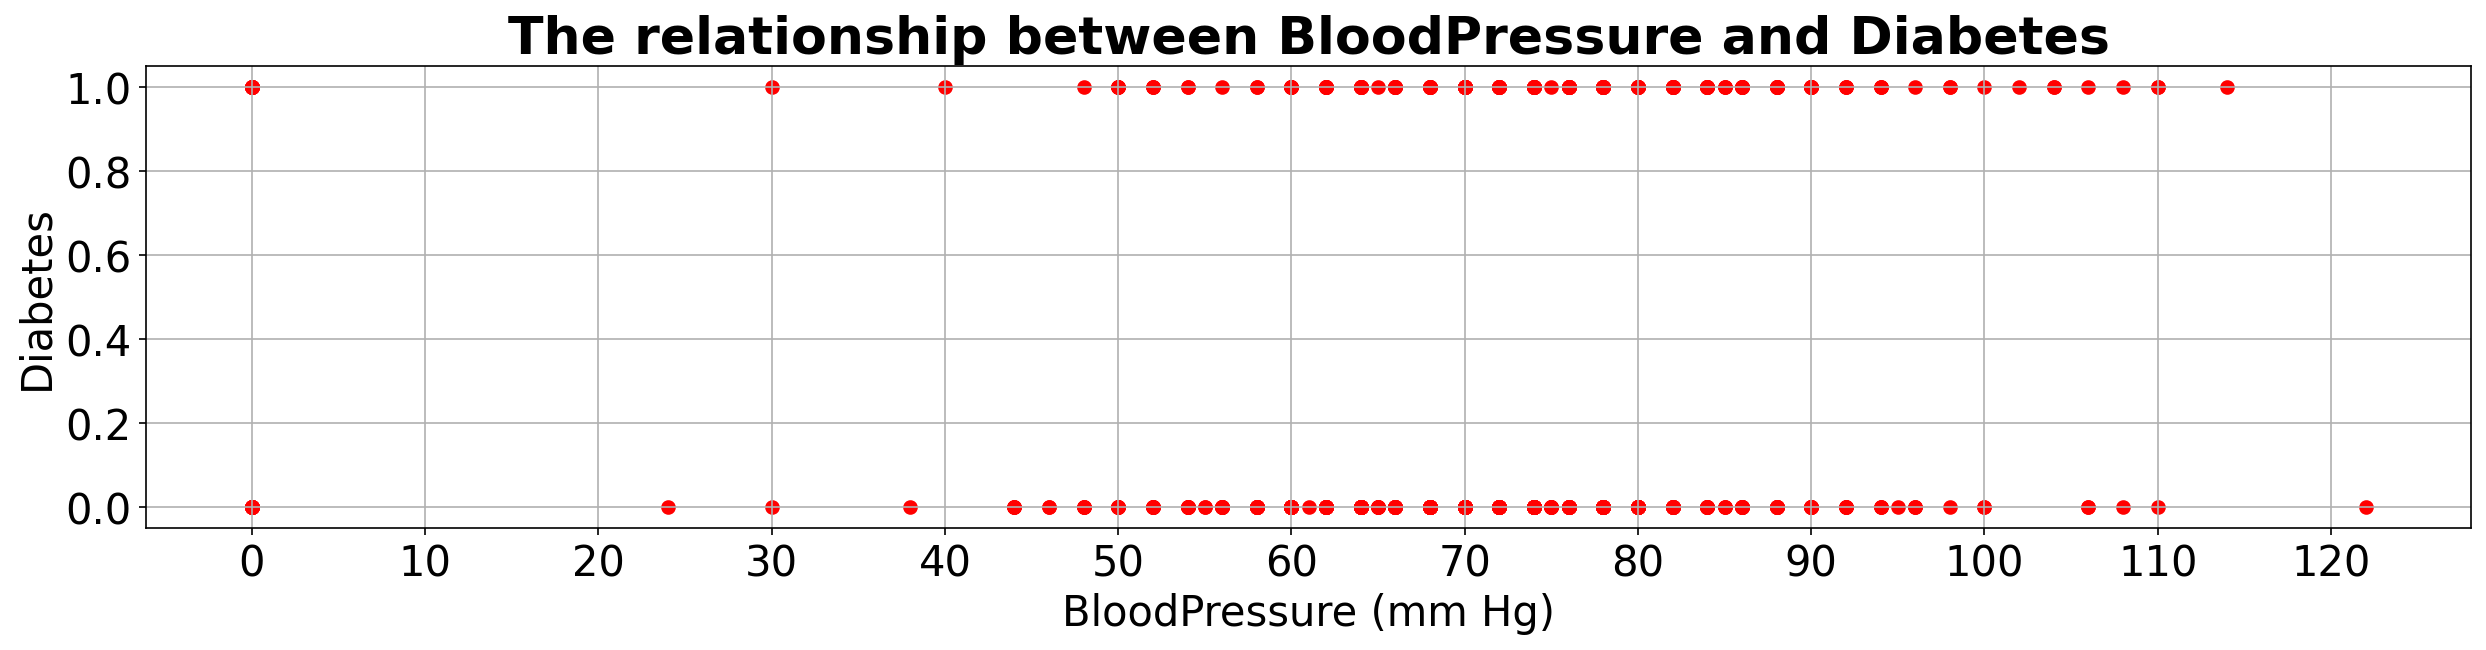

In [19]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Outcome"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure (mm Hg)', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

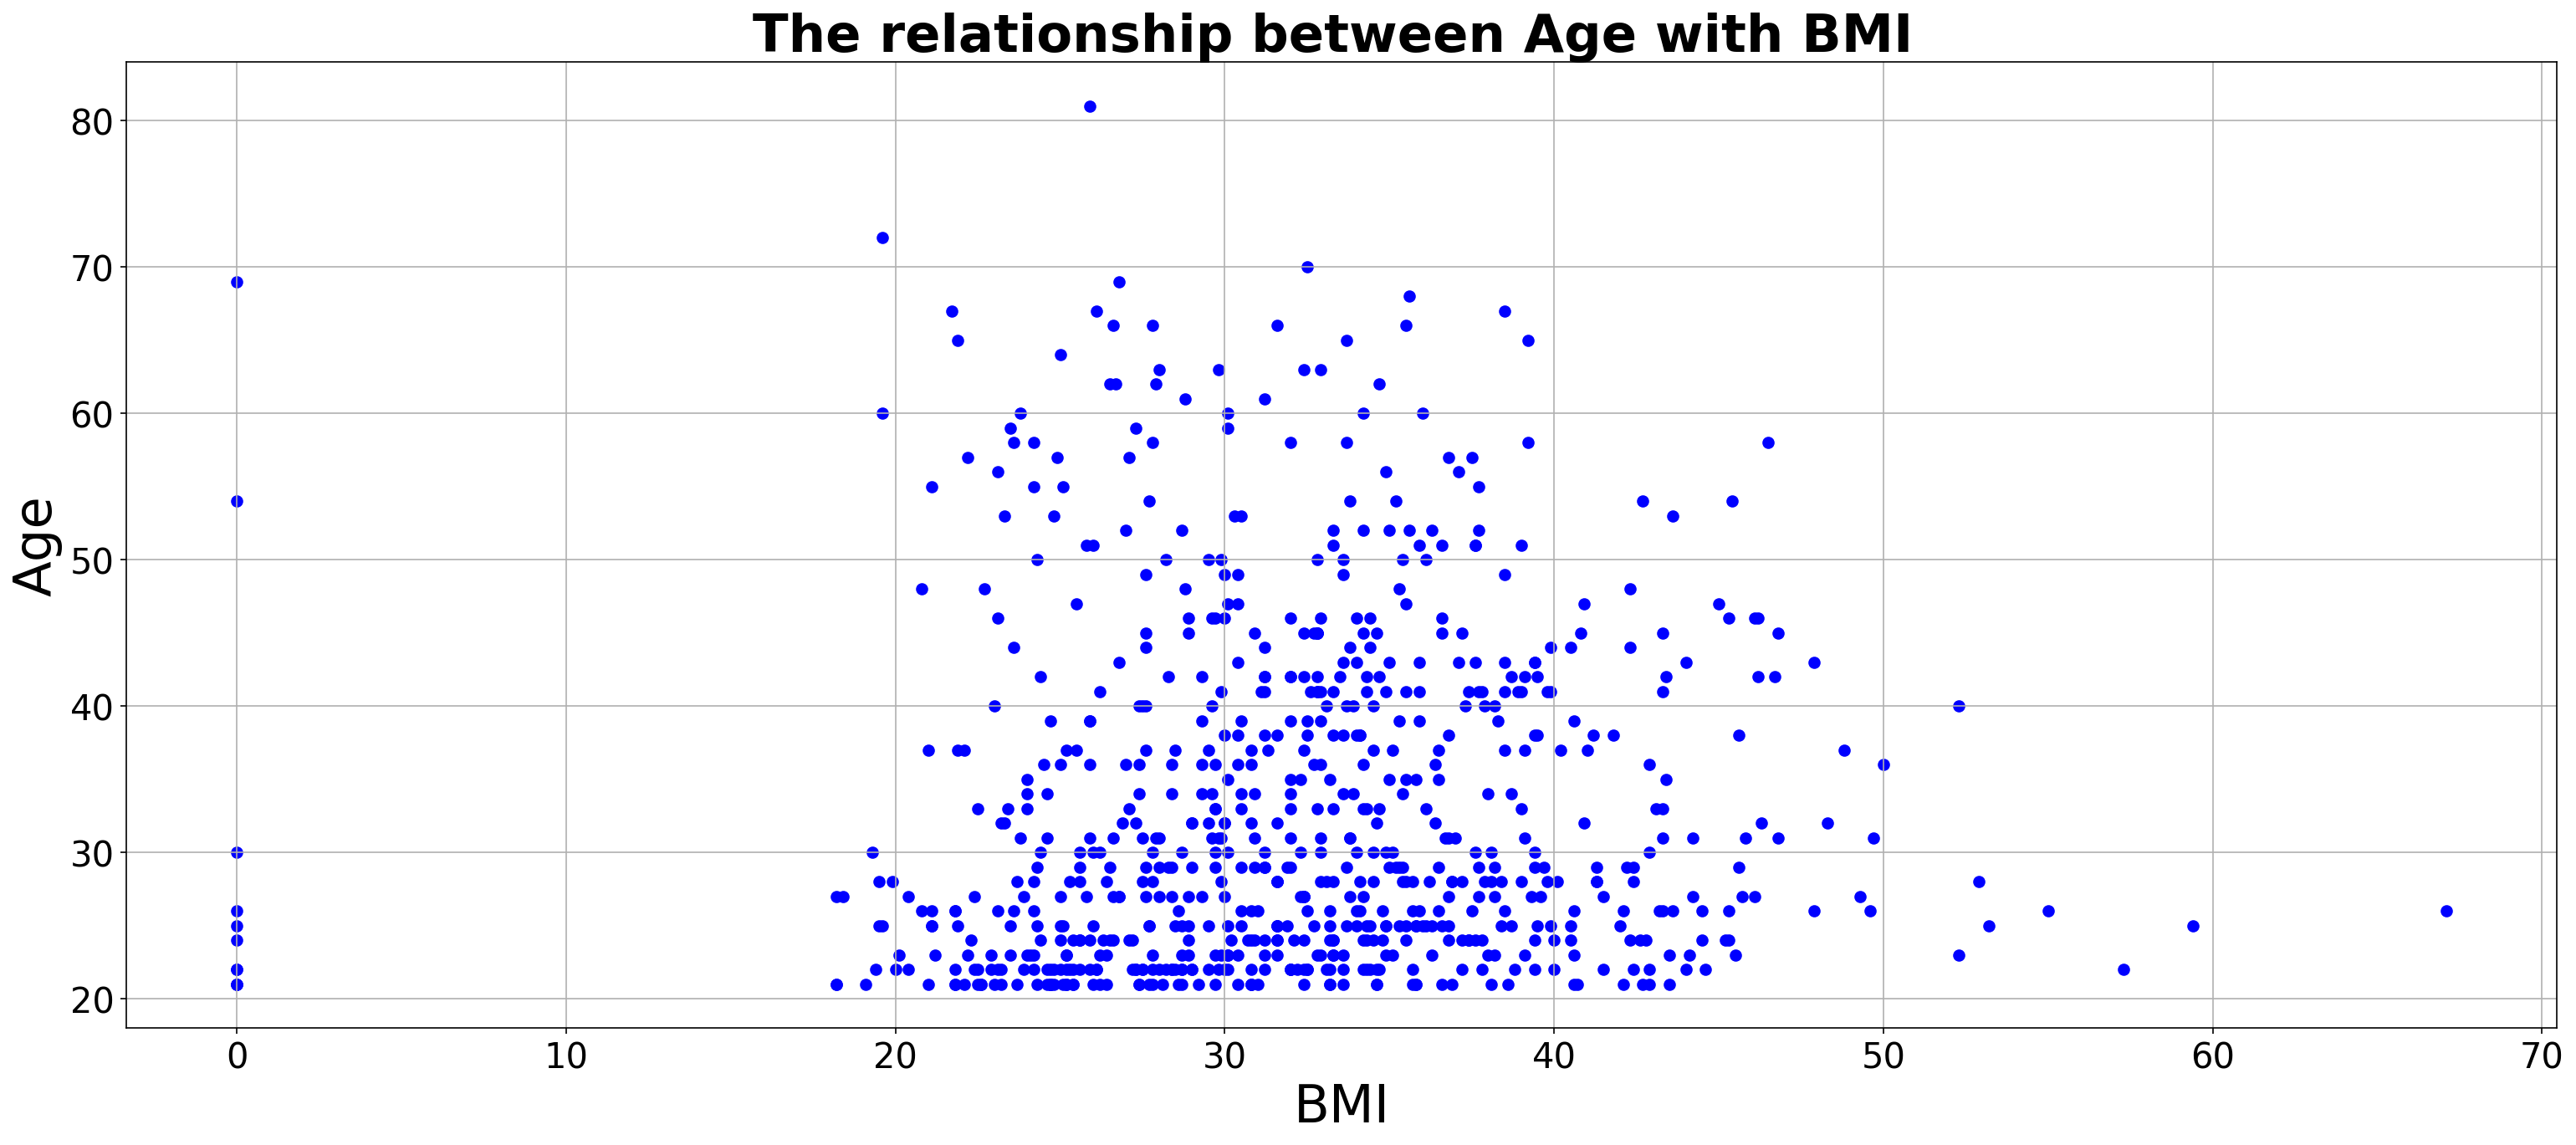

In [20]:
plt.figure(figsize = [25, 10] , dpi = 150) 
plt.scatter (df["BMI"] , df["Age"] , color = "blue")
plt.title ("The relationship between Age with BMI " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 80 , 10) , fontsize = 20)
plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Age' , fontsize = 30)
plt.grid ()
plt.show ()

---------------------------------------------------------------------------------

Selecting features

In [57]:
X = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]) # Features
y = data.Outcome # Target variables

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

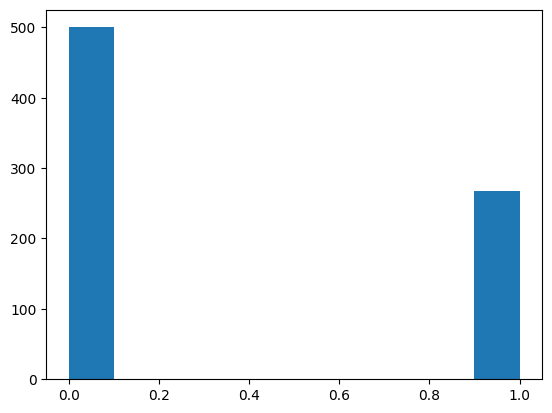

In [22]:
# Among the 768 people, 268 people suffer from diabetes and 500 people do not have diabetes.
plt.hist (y)

In [23]:
# Percentage 
((y == 0).sum ()/len (y)) * 100

65.10416666666666

Split X and y into training and testing sets

In [24]:
# Training = 75 , Testing = 25

X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

In [25]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                     # Fitting a  model    
y_pred = logreg.predict(X_test)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test)   # Predicted probabilities from test features

In [26]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

Accuracy:  0.8072916666666666


In [27]:
logreg.intercept_

array([-5.44885184])

In [28]:
logreg.coef_

array([[ 8.35165502e-02,  2.55489637e-02, -1.65039282e-02,
         5.58049079e-03, -5.38898365e-04,  5.42416860e-02,
         6.08404648e-01,  1.23180729e-02]])

In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124,72,0,0,27.6,0.368,29
301,2,144,58,33,135,31.6,0.422,25
382,1,109,60,8,182,25.4,0.947,21
140,3,128,78,0,0,21.1,0.268,55


In [30]:
logreg.predict_proba(X)

array([[0.34064472, 0.65935528],
       [0.88922599, 0.11077401],
       [0.28795292, 0.71204708],
       ...,
       [0.75406274, 0.24593726],
       [0.670941  , 0.329059  ],
       [0.86385107, 0.13614893]])

In [31]:
logreg.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [32]:
logreg.score(X,y)

0.76953125

In [33]:
confusion_matrix (y , logreg.predict (X))

array([[443,  57],
       [120, 148]], dtype=int64)

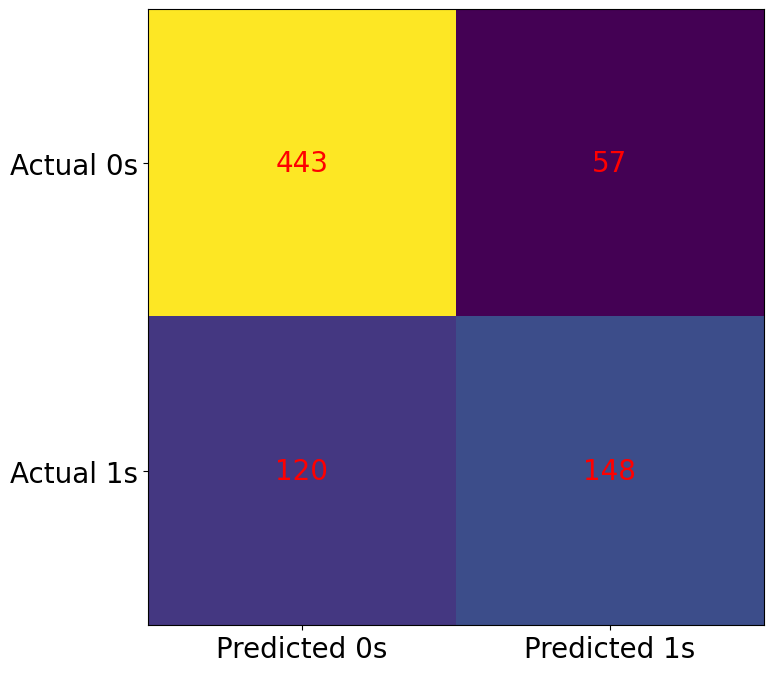

In [34]:
cm = confusion_matrix (y , logreg.predict(X))

fig , ax = plt.subplots (figsize = (8,8))
ax.imshow (cm)
ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual 0s" , "Actual 1s"))

ax.tick_params(axis='both', which='major', labelsize=20)
#ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.xticks(fontsize=14, rotation=90)

ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="red", fontsize = 20 )
plt.show()

In [35]:
print (classification_report (y , logreg.predict (X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [36]:
model = LogisticRegression (solver = "liblinear"  , C = 10.0 , random_state = 0)
model.fit(X,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [37]:
df2 = pd.DataFrame ({"Pregnancies" : [0] , "Glucose" :[80] , "BloodPressure" :[72] ,"SkinThickness" : [0] ,
                    "Insulin" : [0] , "BMI" : [23] , "DiabetesPedigreeFunction" : [0.5] , 
                    "Age" : [30] , "Outcome" : [0]})
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,80,72,0,0,23,0.5,30,0


----------------

In [47]:
df_cleaned= df[(df['Glucose'] != 0) & 
                (df['BloodPressure'] != 0) & 
                (df['SkinThickness'] != 0) & 
                (df['Insulin'] != 0) & 
                (df['BMI'] != 0)]

In [48]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [49]:
df_cleaned.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


<Axes: title={'center': 'Correlation Graph'}>

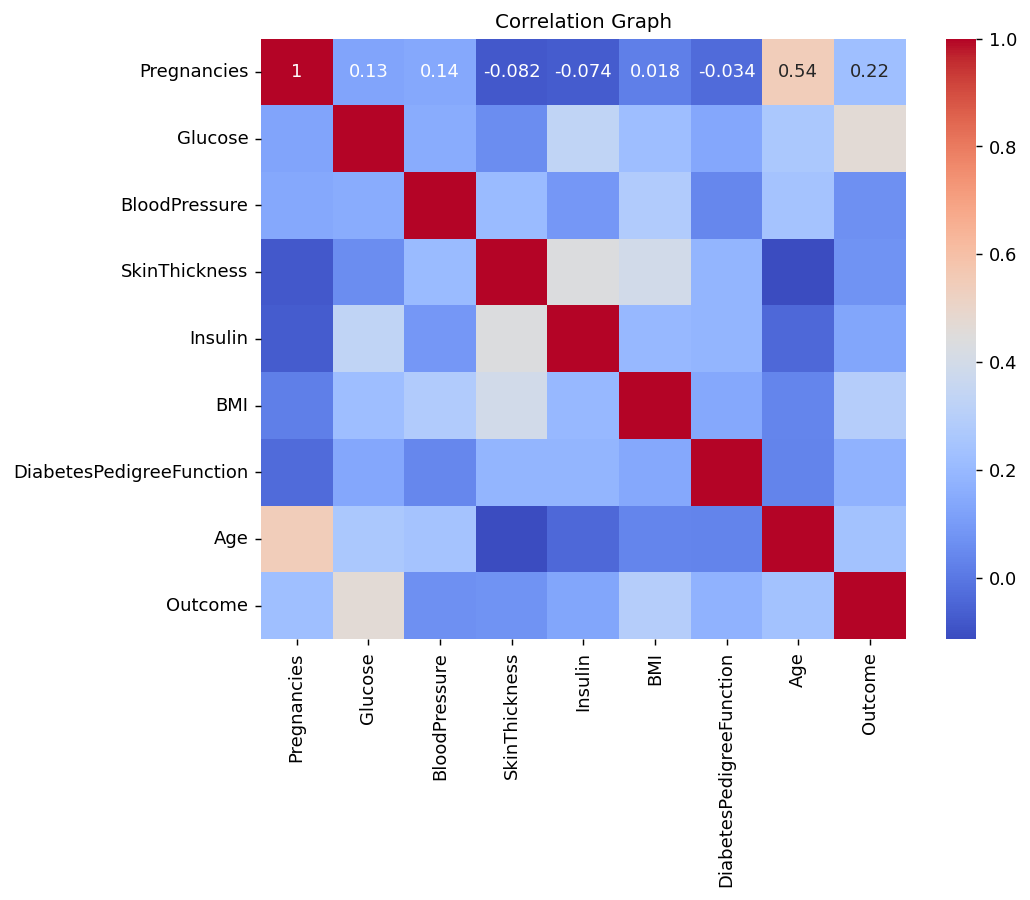

In [51]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

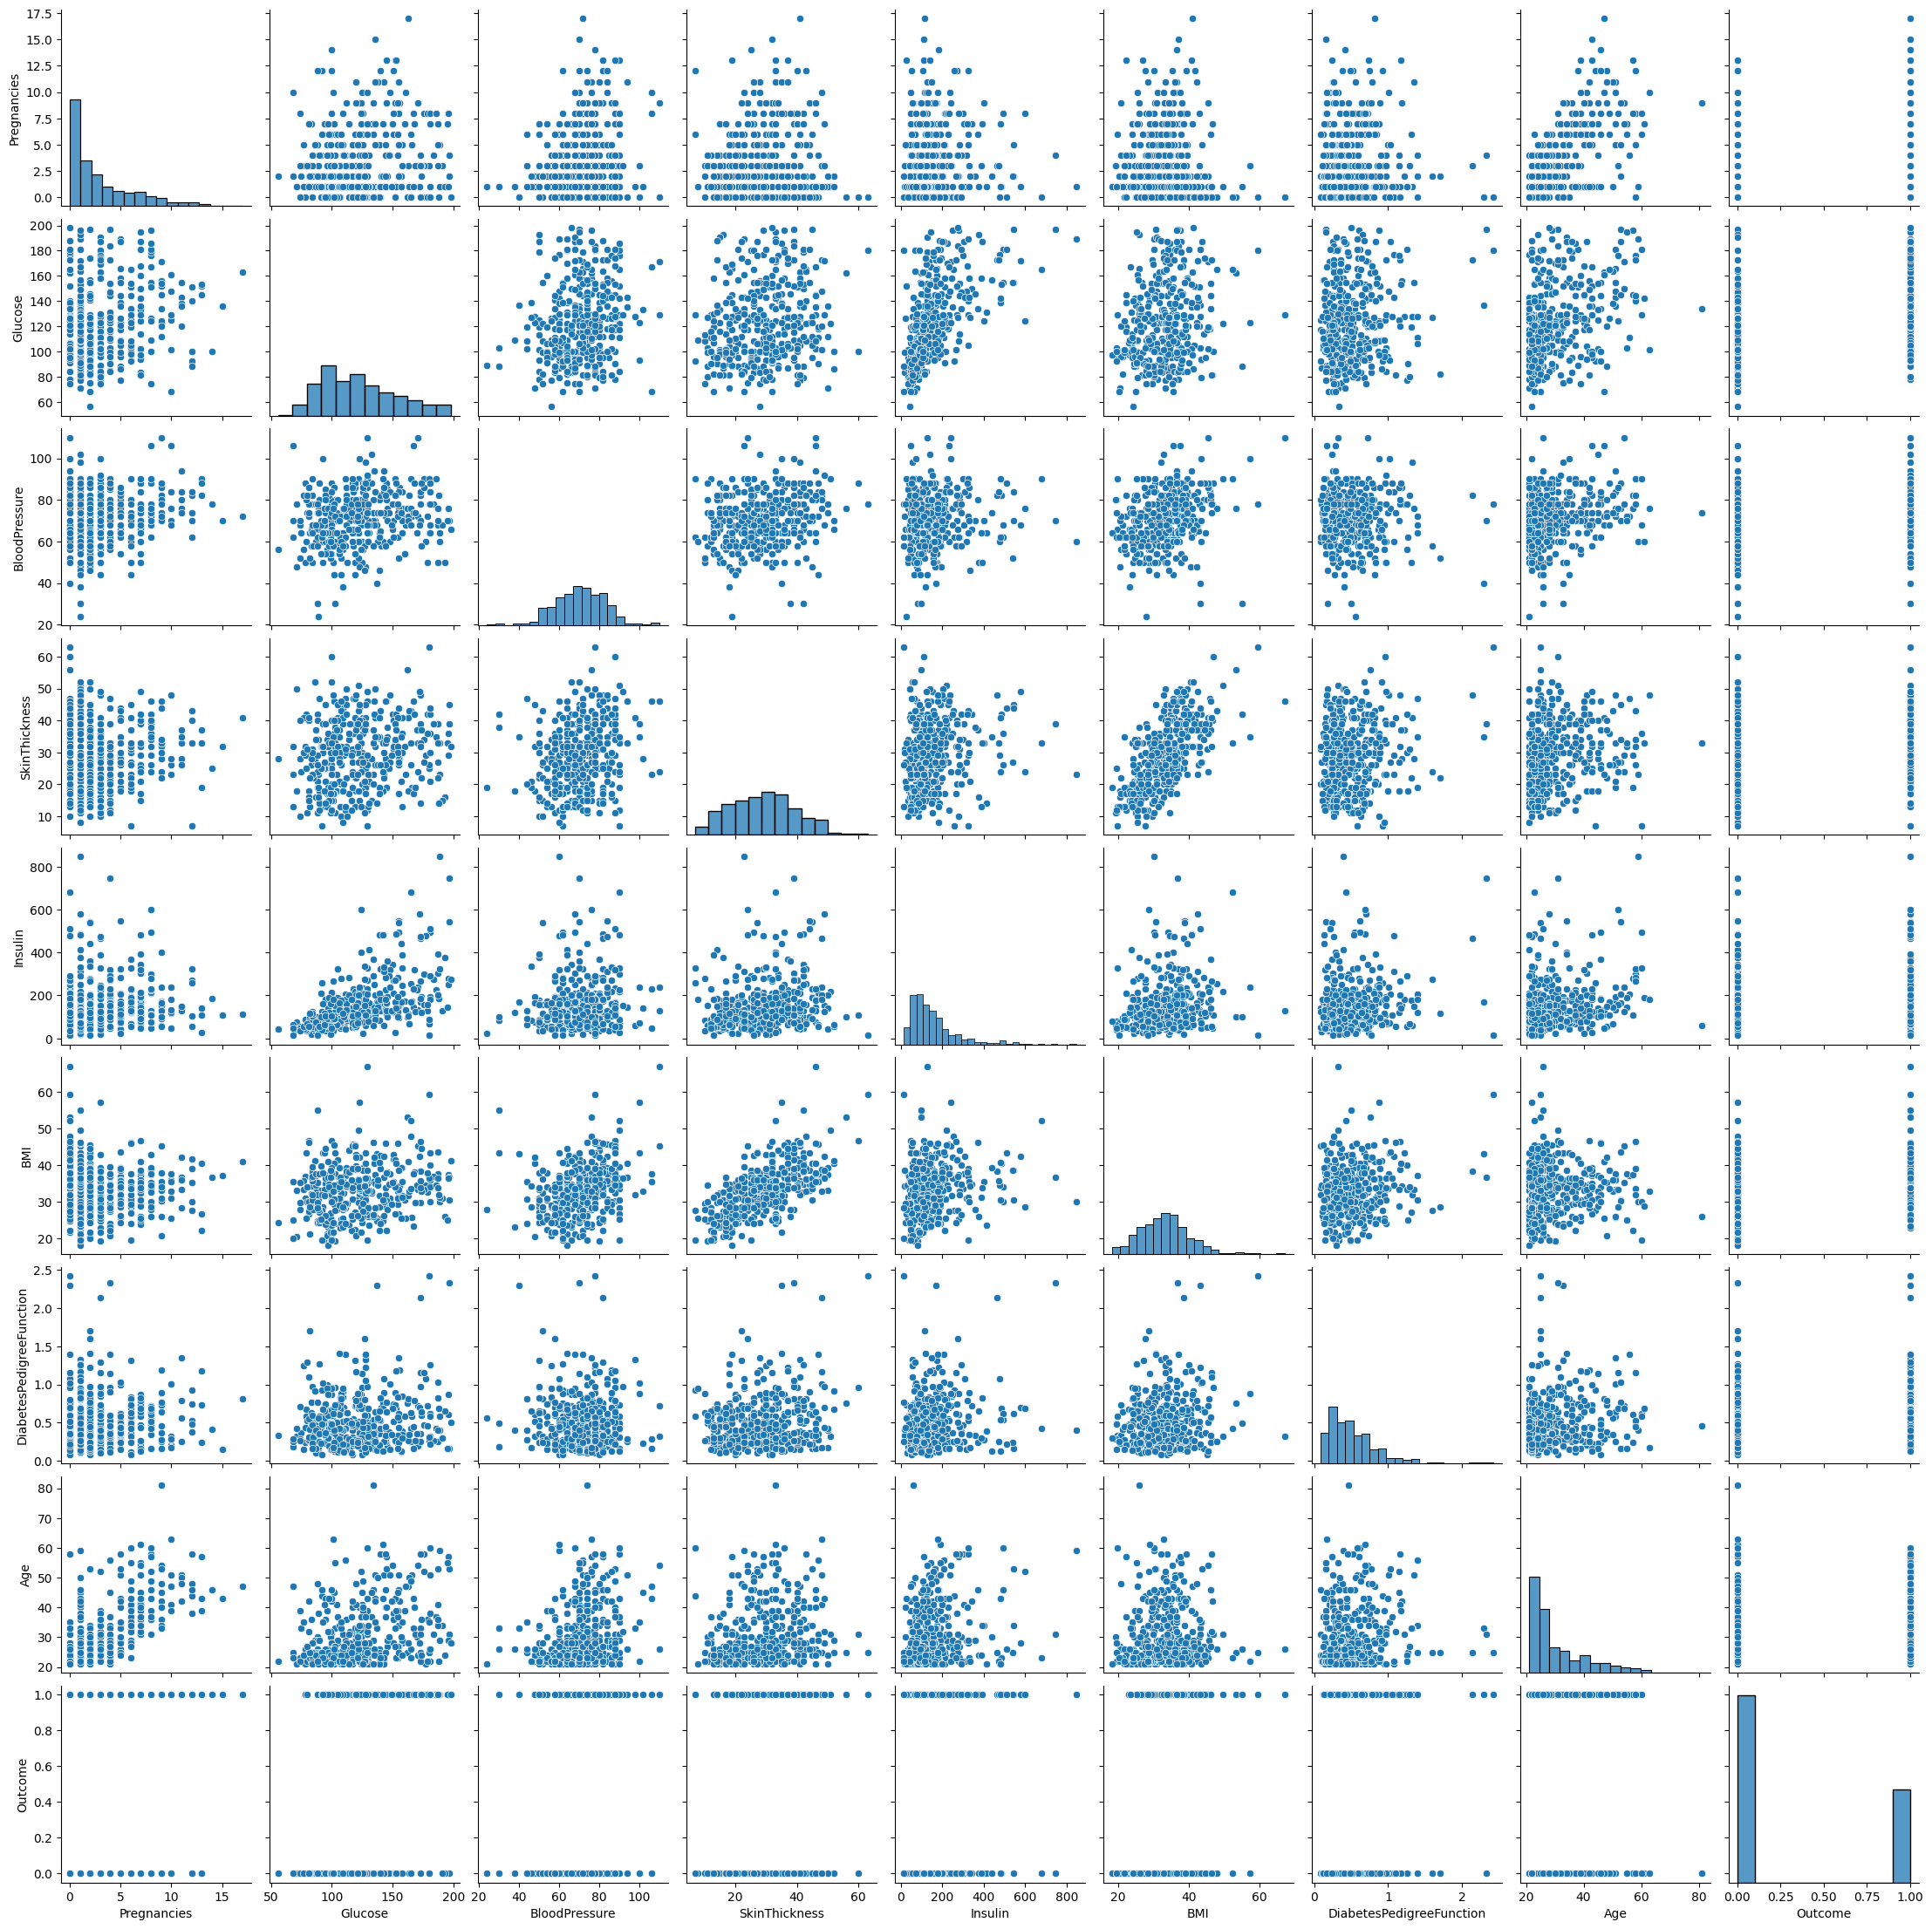

In [52]:
sns.pairplot(df_cleaned)

In [63]:
x2 = df_cleaned[["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]]
y2 = df_cleaned["Outcome"]

In [64]:
# Training = 75 , Testing = 25

x2_train , x2_test , y2_train , y2_test = train_test_split (x2 , y2 , test_size = 0.25 , random_state = 0)

In [71]:
logreg2 = LogisticRegression (solver = "liblinear")

logreg2.fit (x2_train , y2_train)                     # Fitting a  model    
y2_pred = logreg2.predict(x2_test)                    # Predicted class labels from test features
y2_predicted_proba = logreg2.predict_proba(x2_test)   # Predicted probabilities from test features


In [72]:
print ("Accuracy: " , metrics.accuracy_score (y2_test , y2_pred))

Accuracy:  0.8061224489795918


In [67]:
logreg2.intercept_

array([-4.21656006])

In [68]:
logreg2.coef_

array([[ 3.44013390e-02,  2.74025093e-02, -2.45721480e-02,
         2.50828523e-02, -2.37663255e-04,  6.50349263e-03,
         4.76993906e-01,  1.70598430e-02]])

In [69]:
logreg2.score(x2, y2)

0.7882653061224489

In [73]:
import joblib
joblib.dump(logreg2, "logreg2.pkl")

['logreg2.pkl']